In [1]:
#This project aims to create a tool which can take several inputs for a roadway or roadway in missouri and compare the calculated fatal crash rate 
#for said roadway to the rates at a county and state level. This will allow the user to determine if a roadway or roadway network operates at a 
#higher or lower level of safety when compared to the county and state rates and provides a high level analysis of the safety conditions of a study roadway.

#This type of analysis is frequently completed in large scale transportation studies. The overall crash rate is more commonly used in real world studies, but
#there were obstacles in obtaining the necessary data for that application for this project. However, calculating and comparing the fatal crash rate is the 
#same mathematically as the overall crash rate. This tool could easily be updated to include all crash types
#to calculate and compare the overall crash rates when using data that would be more readily available to a transportation engineer completing a study.

In [2]:
#The data set 'fatalities' is a data set containing every fatal crash in missouri from 2016 to 2020. It was downloaded from the missouri state highway patrol 
#web page: https://www.mshp.dps.missouri.gov/TR15Map/Search
#I would have liked to use crashes of all severities for these years, but the web page does not let you export if there is more than 10,000 cases and there
#is more than 10,000 crashes per month.

#This data set is publicaly available. The data on this web page has been scrubbed of personal information and many of the other variable columns have been
#deleted by the state before publication. 

#This data set is the first of three sources and is stored as a local file in the project folder in csv format.
import pandas as pd

fatalities = pd.read_csv('Fatalities2016_2020.csv')

In [3]:
#The crash data has a column for the report number (Rpt No), day of the week (Weekday), date (Date), time (Time), vehicles involved (Veh Count), agency (Agency), 
#police troop classiciation (Troop), county (County), city (City), collision type (Type), injury severity (Severity), primary intersectio street (At Street),
#side intersection street (On Street), lighting condition (Light Cond), number injured (Injured), and number killed (Killed). 

fatalities.head()

,Map,Rpt No,Weekday,Date,Time,Veh Count,Agency,Troop,County,City,Type,Severity,At Street,On Street,Light Cond,Injured,Killed
0,Mapped,'201600002 ',Fri,1/1/2016,10:45:00,1,Mansfield PD,G,WRIGHT,MANSFIELD,Fixed Object,Fatal,CST MADISON AVE,CST COMMERCIAL ST,Daylight,0,1
1,Mapped,'16000017 ',Fri,1/1/2016,19:35:00,1,Grandview PD,A,JACKSON,GRANDVIEW,Fixed Object,Fatal,CST SECOND ST,CST MAIN ST,Dark-Lighted,0,1
2,Mapped,'160003717 ',Sat,1/2/2016,21:06:00,1,Missouri State Highway Patrol-Troop C,C,JEFFERSON,NON-CITY OR UNINCORPORATED,Fixed Object,Fatal,CRD HAWKS RD,CRD CALVEY CREEK RD,Dark-Unlighted,1,2
3,Mapped,'160004599 ',Sun,1/3/2016,9:35:00,2,Missouri State Highway Patrol-Troop D,D,TANEY,MERRIAM WOODS,Motor Vehicle in Transport,Fatal,MO 176 MJ,US 160,Daylight,1,1
4,Mapped,'160004701 ',Sun,1/3/2016,10:30:00,2,Missouri State Highway Patrol-Troop I,I,PHELPS,NON-CITY OR UNINCORPORATED,Motor Vehicle in Transport,Fatal,RT W,US 63,Daylight,0,1


In [4]:
#The data set 'county_vmt' is the total number of vehicle miles traveled (vmt) by county for each year from 2017 through 2020. VMT is used as the exposure 
#measure when calculating crash rates. The data was taken from MoDOT's Data Zone website using the Data Summary Tool found here: 
#http://modatazone.modot.org/index.php/traffic. The tool allows you to create pivot tables for various traffic statistics in the state and export to a desired
#file format. The website only allows a user to go back to 2017. 

#This data set is the second of three sources and is stored as a local file in the project folder in xlsx format.

county_vmt = pd.read_excel ('CountyVMT2017_2020.xlsx')

In [5]:
county_vmt.head()

,County,2017,2018,2019,2020,Sum
0,ADAIR,557579,561562,583249,552606,2254996
1,ANDREW,936173,957792,992127,919076,3805168
2,ATCHISON,526779,502098,518021,473397,2020295
3,AUDRAIN,713629,720394,712968,676370,2823361
4,BARRY,983498,986182,1013327,963483,3946490


In [6]:
#This line brings in an html tables from the Missouri Highway Patrol Statistical Analysis Center. The table is a list of Death Rate and Injury crash rates for
#the state of Missouri from 1978 to 2015. This will later be used to compare the calculated fatal crash rates of the input data to the state rates.

#This data set is a third of three sources and is pulled from a web page in html format.

state_tables = pd.read_html('http://www.mshp.dps.mo.gov/MSHPWeb/SAC/crash_data_rates_960grid.html')

In [7]:
#This line checks how many tables are present in the html link. The output shows there is one available so we do not need to make sure we are selecting
#the correct table.

len(state_tables)

1

In [8]:
#As there was only one table in the html page from the line above, we can just take the "first" [0] table from the page and rename it to a dataframe

rate_tables = state_tables[0]

rate_tables.head()

,Year,Death Rate,Injury Rate
0,1978,3.5,193.2
1,1979,3.4,178.1
2,1980,3.5,168.8
3,1981,3.0,166.6
4,1982,2.6,155.1


In [9]:
#We will want to pivot this data so as to format the table to have the county names as the rows and the death rate for each year as the columns. Each county 
#row will have the same Death Rate value for each year column as this will make it easier to merge with the other data by using county name as a key later.

#These lines create a dataframe with the first column is the names of the counties taken from the county_vmt table
county_names = county_vmt['County']
rate_tables_county = pd.DataFrame(county_names)
rate_tables_county.head()

,County
0,ADAIR
1,ANDREW
2,ATCHISON
3,AUDRAIN
4,BARRY


In [10]:
#Now we want to transpose the rate_tables df so we can add the state Death Rate to each county with the year as the column header

rate_tables_transposed = rate_tables.transpose()
rate_tables_transposed

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
Year,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
Death Rate,3.5,3.4,3.5,3.0,2.6,2.5,2.6,2.4,2.7,2.4,...,1.6,1.4,1.4,1.3,1.2,1.1,1.2,1.1,1.1,1.2
Injury Rate,193.2,178.1,168.8,166.6,155.1,156.9,169.4,172.9,169.8,158.6,...,91.8,88.2,82.4,79.2,78.9,74.3,73.1,72.0,68.7,75.0


In [11]:
#Make the Death Rate row into a object to reference in to column values in the rate_tables_county dataframe
state_death_rate = rate_tables_transposed.loc["Death Rate"]
state_death_rate.head()

0    3.5
1    3.4
2    3.5
3    3.0
4    2.6
Name: Death Rate, dtype: float64

In [12]:
#Add a column for each year from 2000 to 2015 with the state fatality rate for the year and attach it to each column. "SR" will stand for "State Rate"
#The year 2000 rate corresponds to state_death_rate[22]

rate_tables_county['2000 SR'] = state_death_rate[22]
rate_tables_county['2001 SR'] = state_death_rate[23]
rate_tables_county['2002 SR'] = state_death_rate[24]
rate_tables_county['2003 SR'] = state_death_rate[25]
rate_tables_county['2004 SR'] = state_death_rate[26]
rate_tables_county['2005 SR'] = state_death_rate[27]
rate_tables_county['2006 SR'] = state_death_rate[28]
rate_tables_county['2007 SR'] = state_death_rate[29]
rate_tables_county['2008 SR'] = state_death_rate[30]
rate_tables_county['2009 SR'] = state_death_rate[31]
rate_tables_county['2010 SR'] = state_death_rate[32]
rate_tables_county['2011 SR'] = state_death_rate[33]
rate_tables_county['2012 SR'] = state_death_rate[34]
rate_tables_county['2013 SR'] = state_death_rate[35]
rate_tables_county['2014 SR'] = state_death_rate[36]
rate_tables_county['2015 SR'] = state_death_rate[37]

rate_tables_county.head()

,County,2000 SR,2001 SR,2002 SR,2003 SR,2004 SR,2005 SR,2006 SR,2007 SR,2008 SR,2009 SR,2010 SR,2011 SR,2012 SR,2013 SR,2014 SR,2015 SR
0,ADAIR,1.7,1.6,1.8,1.8,1.7,1.8,1.6,1.4,1.4,1.3,1.2,1.1,1.2,1.1,1.1,1.2
1,ANDREW,1.7,1.6,1.8,1.8,1.7,1.8,1.6,1.4,1.4,1.3,1.2,1.1,1.2,1.1,1.1,1.2
2,ATCHISON,1.7,1.6,1.8,1.8,1.7,1.8,1.6,1.4,1.4,1.3,1.2,1.1,1.2,1.1,1.1,1.2
3,AUDRAIN,1.7,1.6,1.8,1.8,1.7,1.8,1.6,1.4,1.4,1.3,1.2,1.1,1.2,1.1,1.1,1.2
4,BARRY,1.7,1.6,1.8,1.8,1.7,1.8,1.6,1.4,1.4,1.3,1.2,1.1,1.2,1.1,1.1,1.2


In [13]:
#The next step to creating this tool is to create the formatted data tables to which the input data will be compared. This starts with a reformat several things
#in the fatalities table. First we need to transform the data column to just include the year. For this application, we do not care about the day and month as
#we will be aggragating and grouping the crashes by year. This will make it easier to join with the VMT data for each county by year later on.

#This is data transformation number one.

fatalities['Date'] = pd.to_datetime(fatalities['Date'])

In [14]:
#Check that the Date column was correctly changed to datetime format

fatalities.head()

,Map,Rpt No,Weekday,Date,Time,Veh Count,Agency,Troop,County,City,Type,Severity,At Street,On Street,Light Cond,Injured,Killed
0,Mapped,'201600002 ',Fri,2016-01-01,10:45:00,1,Mansfield PD,G,WRIGHT,MANSFIELD,Fixed Object,Fatal,CST MADISON AVE,CST COMMERCIAL ST,Daylight,0,1
1,Mapped,'16000017 ',Fri,2016-01-01,19:35:00,1,Grandview PD,A,JACKSON,GRANDVIEW,Fixed Object,Fatal,CST SECOND ST,CST MAIN ST,Dark-Lighted,0,1
2,Mapped,'160003717 ',Sat,2016-01-02,21:06:00,1,Missouri State Highway Patrol-Troop C,C,JEFFERSON,NON-CITY OR UNINCORPORATED,Fixed Object,Fatal,CRD HAWKS RD,CRD CALVEY CREEK RD,Dark-Unlighted,1,2
3,Mapped,'160004599 ',Sun,2016-01-03,9:35:00,2,Missouri State Highway Patrol-Troop D,D,TANEY,MERRIAM WOODS,Motor Vehicle in Transport,Fatal,MO 176 MJ,US 160,Daylight,1,1
4,Mapped,'160004701 ',Sun,2016-01-03,10:30:00,2,Missouri State Highway Patrol-Troop I,I,PHELPS,NON-CITY OR UNINCORPORATED,Motor Vehicle in Transport,Fatal,RT W,US 63,Daylight,0,1


In [15]:
#Create a new column 'Year' by pulling the year segement from the 'Date' column

#This is data transformation number two.

fatalities['Year'] = pd.DatetimeIndex(fatalities['Date']).year

In [16]:
fatalities.head()

,Map,Rpt No,Weekday,Date,Time,Veh Count,Agency,Troop,County,City,Type,Severity,At Street,On Street,Light Cond,Injured,Killed,Year
0,Mapped,'201600002 ',Fri,2016-01-01,10:45:00,1,Mansfield PD,G,WRIGHT,MANSFIELD,Fixed Object,Fatal,CST MADISON AVE,CST COMMERCIAL ST,Daylight,0,1,2016
1,Mapped,'16000017 ',Fri,2016-01-01,19:35:00,1,Grandview PD,A,JACKSON,GRANDVIEW,Fixed Object,Fatal,CST SECOND ST,CST MAIN ST,Dark-Lighted,0,1,2016
2,Mapped,'160003717 ',Sat,2016-01-02,21:06:00,1,Missouri State Highway Patrol-Troop C,C,JEFFERSON,NON-CITY OR UNINCORPORATED,Fixed Object,Fatal,CRD HAWKS RD,CRD CALVEY CREEK RD,Dark-Unlighted,1,2,2016
3,Mapped,'160004599 ',Sun,2016-01-03,9:35:00,2,Missouri State Highway Patrol-Troop D,D,TANEY,MERRIAM WOODS,Motor Vehicle in Transport,Fatal,MO 176 MJ,US 160,Daylight,1,1,2016
4,Mapped,'160004701 ',Sun,2016-01-03,10:30:00,2,Missouri State Highway Patrol-Troop I,I,PHELPS,NON-CITY OR UNINCORPORATED,Motor Vehicle in Transport,Fatal,RT W,US 63,Daylight,0,1,2016


In [17]:
#Next, we want to merge the crash data with the county data so we can calculate crash rates. In order to do so, we must first pivot the fatalities data
#to show the number of fatal crashes per year by county.

#This is data pivot number two.

county_crashes = pd.pivot_table(fatalities,
    values='Rpt No',
    columns='Year',
    index='County',
    aggfunc='count')

In [18]:
county_crashes.head()

Year,2016,2017,2018,2019,2020
County,,,,,
ADAIR,4.0,3.0,2.0,1.0,4.0
ANDREW,7.0,2.0,4.0,1.0,5.0
ATCHISON,1.0,1.0,1.0,1.0,1.0
AUDRAIN,5.0,7.0,5.0,1.0,NaN
BARRY,7.0,7.0,13.0,9.0,11.0


In [19]:
#Drops the empty cells below the years

county_crashes.reset_index(inplace = True)

#Change the column names to the say "Year Crashes" in order to differentiate from the yearly VMTs that will be joined later on

#This is transformation number three

county_crashes.columns = ['County', '2016 Crashes', '2017 Crashes', '2018 Crashes', '2019 Crashes', '2020 Crashes']

In [20]:
county_crashes.head()

,County,2016 Crashes,2017 Crashes,2018 Crashes,2019 Crashes,2020 Crashes
0,ADAIR,4.0,3.0,2.0,1.0,4.0
1,ANDREW,7.0,2.0,4.0,1.0,5.0
2,ATCHISON,1.0,1.0,1.0,1.0,1.0
3,AUDRAIN,5.0,7.0,5.0,1.0,NaN
4,BARRY,7.0,7.0,13.0,9.0,11.0


In [21]:
#We now have the number of crashes by year for each county. In order to calculate the fatal crash rates, we will need to join the county_crashes table with
#the VMT table. First, the VMT column lables should be adjusted to avoid confusion. The column names will be changed to say "Year VMT" for each year.
#The sum column is not needed so it will be dropped to clean things up.

#These is data transformations number four and five.

county_vmt.columns = ['County', '2017 VMT', '2018 VMT', '2019 VMT', '2020 VMT', 'Sum']
del county_vmt['Sum']

county_vmt.head()

,County,2017 VMT,2018 VMT,2019 VMT,2020 VMT
0,ADAIR,557579,561562,583249,552606
1,ANDREW,936173,957792,992127,919076
2,ATCHISON,526779,502098,518021,473397
3,AUDRAIN,713629,720394,712968,676370
4,BARRY,983498,986182,1013327,963483


In [22]:
#Now we can merge the county vmt and crash tables together.

#This is data merge number one

county_vmt_crashes = pd.merge(county_vmt, county_crashes, left_on = 'County', right_on = 'County', how = 'left')
county_vmt_crashes.head()

,County,2017 VMT,2018 VMT,2019 VMT,2020 VMT,2016 Crashes,2017 Crashes,2018 Crashes,2019 Crashes,2020 Crashes
0,ADAIR,557579,561562,583249,552606,4.0,3.0,2.0,1.0,4.0
1,ANDREW,936173,957792,992127,919076,7.0,2.0,4.0,1.0,5.0
2,ATCHISON,526779,502098,518021,473397,1.0,1.0,1.0,1.0,1.0
3,AUDRAIN,713629,720394,712968,676370,5.0,7.0,5.0,1.0,NaN
4,BARRY,983498,986182,1013327,963483,7.0,7.0,13.0,9.0,11.0


In [23]:
#Before the rates are calculated, the VMTs must first be scaled up as they are reported in 1000's of miles in the database the data was taken from.

county_vmt_crashes['2017 VMT'] = county_vmt_crashes['2017 VMT'] * 1000
county_vmt_crashes['2018 VMT'] = county_vmt_crashes['2018 VMT'] * 1000
county_vmt_crashes['2019 VMT'] = county_vmt_crashes['2019 VMT'] * 1000
county_vmt_crashes['2020 VMT'] = county_vmt_crashes['2020 VMT'] * 1000

In [24]:
#Now we will create the fatal crash rates for years 2017-2020. Crash rates are calculated for the number of crashes per 100 million vehicle miles traveled

county_vmt_crashes['2017 Rate'] = (county_vmt_crashes['2017 Crashes'] * 100000000) / (county_vmt_crashes['2017 VMT'])
county_vmt_crashes['2018 Rate'] = (county_vmt_crashes['2018 Crashes'] * 100000000) / (county_vmt_crashes['2018 VMT'])
county_vmt_crashes['2019 Rate'] = (county_vmt_crashes['2019 Crashes'] * 100000000) / (county_vmt_crashes['2019 VMT'])
county_vmt_crashes['2020 Rate'] = (county_vmt_crashes['2020 Crashes'] * 100000000) / (county_vmt_crashes['2020 VMT'])

In [25]:
county_vmt_crashes.head()

,County,2017 VMT,2018 VMT,2019 VMT,2020 VMT,2016 Crashes,2017 Crashes,2018 Crashes,2019 Crashes,2020 Crashes,2017 Rate,2018 Rate,2019 Rate,2020 Rate
0,ADAIR,557579000,561562000,583249000,552606000,4.0,3.0,2.0,1.0,4.0,0.538040,0.356149,0.171453,0.723843
1,ANDREW,936173000,957792000,992127000,919076000,7.0,2.0,4.0,1.0,5.0,0.213636,0.417627,0.100794,0.544025
2,ATCHISON,526779000,502098000,518021000,473397000,1.0,1.0,1.0,1.0,1.0,0.189833,0.199164,0.193042,0.211239
3,AUDRAIN,713629000,720394000,712968000,676370000,5.0,7.0,5.0,1.0,NaN,0.980902,0.694065,0.140259,NaN
4,BARRY,983498000,986182000,1013327000,963483000,7.0,7.0,13.0,9.0,11.0,0.711745,1.318215,0.888163,1.141691


In [26]:
#Now we will join the state crash rates to the count_vmt_crashes in order to create one final combined table with the county rates and state rates. 

#This is data merge number two

county_state_rates = pd.merge(county_vmt_crashes, rate_tables_county, left_on = 'County', right_on = 'County', how = 'left')

#We also want to reset the index column of the dataframe to be the 'County' column so we can reference it later.

final_format = county_state_rates.set_index("County", drop = True)


final_format.head()

,2017 VMT,2018 VMT,2019 VMT,2020 VMT,2016 Crashes,2017 Crashes,2018 Crashes,2019 Crashes,2020 Crashes,2017 Rate,...,2006 SR,2007 SR,2008 SR,2009 SR,2010 SR,2011 SR,2012 SR,2013 SR,2014 SR,2015 SR
County,,,,,,,,,,,,,,,,,,,,,
ADAIR,557579000,561562000,583249000,552606000,4.0,3.0,2.0,1.0,4.0,0.538040,...,1.6,1.4,1.4,1.3,1.2,1.1,1.2,1.1,1.1,1.2
ANDREW,936173000,957792000,992127000,919076000,7.0,2.0,4.0,1.0,5.0,0.213636,...,1.6,1.4,1.4,1.3,1.2,1.1,1.2,1.1,1.1,1.2
ATCHISON,526779000,502098000,518021000,473397000,1.0,1.0,1.0,1.0,1.0,0.189833,...,1.6,1.4,1.4,1.3,1.2,1.1,1.2,1.1,1.1,1.2
AUDRAIN,713629000,720394000,712968000,676370000,5.0,7.0,5.0,1.0,NaN,0.980902,...,1.6,1.4,1.4,1.3,1.2,1.1,1.2,1.1,1.1,1.2
BARRY,983498000,986182000,1013327000,963483000,7.0,7.0,13.0,9.0,11.0,0.711745,...,1.6,1.4,1.4,1.3,1.2,1.1,1.2,1.1,1.1,1.2


In [27]:
#Now we have fatal crash rates for 2017 through 2020 by county in the county_cmt_crashes dataframe and the state fatal crash rates in the same table.
#We will now create a function which can take several inputs (county name, number of fatal crashes, and vmt) for a roadway or roadway network and compare
#the calculated fatal crash rate to the fatal crash rate in both the county that the inputs are from and the overall state rates.

#comp_rate will be used later for data visualization
#rate_output is used to show an immediate calculation of the fatal crash rate

In [28]:
#First line creates a list to be called upon later
comp_rate = []

def rate_calc(county, fatal_crashes, vmt):
    '''
    (str, int, int) -> list
    This function takes the name of the county in which the study roadway in question is located, the number of fatal crashes on that roadway over a defined time period
    and the vmt of the roadway over the same time period as the fatal crashes
    
    '''      
    comp_rate.clear()
    
    rate = 0
    
    rate_output = []
    rate = round((fatal_crashes * 100000000) / vmt, 6)
    
    comp_rate.append(county)
    comp_rate.append(rate)
    comp_rate.append(vmt)
    
    rate_output = [county, rate]
    
    return rate_output

In [29]:
#Lets check the rate_calc is working correctly by calculating the rate for ADAIR county in 2017.

assert(rate_calc('ADAIR', 3, 557579000)) == ['ADAIR', 0.538040]

In [30]:
#Now that we now the function works, we are going to input some example data for comparison. Let's say for example we are examining a particular stretch of a
#road in Barry county. Lets say there were 2 fatal crashes on the roadway in question over the past 5 years (a common stretch of time for safety analysis), and
#we calculate from traffic counts that the VMT on this stretch of roadway was 60000000 over the past 5 years. Lets input this example data into the function
#and use it to see how it compares to the crash rates in Barry county and the state.

In [31]:
rate_calc('BARRY', 2, 75000000)

['BARRY', 2.666667]

In [32]:
#Now we have a working function that takes inputs from the user, calculates the fatal crash rate, and returns the county name along with the calculated fatal
#crash rate. Now we will create data visualizations to illustrate how the calculated rate from the input compares the county and state rates

#The first data visualization will be the the calculated rate from the input values vs the rate in the input county from 2017 to 2020

#In order to pull up the county data, we need to pull it from the final_format data frame based. The correct row will be pulled based on the county
#given in the input for the rate_calc function

sel_row = final_format.loc[comp_rate[0]]

In [33]:
sel_row

2017 VMT        9.834980e+08
2018 VMT        9.861820e+08
2019 VMT        1.013327e+09
2020 VMT        9.634830e+08
2016 Crashes    7.000000e+00
2017 Crashes    7.000000e+00
2018 Crashes    1.300000e+01
2019 Crashes    9.000000e+00
2020 Crashes    1.100000e+01
2017 Rate       7.117452e-01
2018 Rate       1.318215e+00
2019 Rate       8.881634e-01
2020 Rate       1.141691e+00
2000 SR         1.700000e+00
2001 SR         1.600000e+00
2002 SR         1.800000e+00
2003 SR         1.800000e+00
2004 SR         1.700000e+00
2005 SR         1.800000e+00
2006 SR         1.600000e+00
2007 SR         1.400000e+00
2008 SR         1.400000e+00
2009 SR         1.300000e+00
2010 SR         1.200000e+00
2011 SR         1.100000e+00
2012 SR         1.200000e+00
2013 SR         1.100000e+00
2014 SR         1.100000e+00
2015 SR         1.200000e+00
Name: BARRY, dtype: float64

Text(0.5, 1.0, 'Figure 1. County Fatal Rate Comparison')

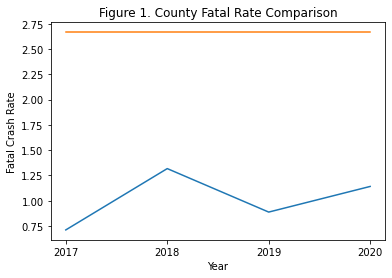

In [34]:
#Now we plot the county rate for from 2017-2020 and overlay the calculated rate from the inputs to show how the calculated rate compares to fatal rate
#in the county over the past few years

import matplotlib.pyplot as plt
import numpy as np

#y1 pulls the county crash rates from the correct county depending on what county was input for the calculated rate in the rate_calc function
x1 = [2017, 2018, 2019, 2020]
y1 = [sel_row['2017 Rate'], sel_row['2018 Rate'], sel_row['2019 Rate'], sel_row['2020 Rate']]

plt.plot(x1, y1, label = 'County Fatal Rate')
plt.xticks(np.arange(2017, 2021, 1))

#y2 recalls the calculated fatal rate from the rate_calc function
x2 = [2017, 2018, 2019, 2020]
y2 = [comp_rate[1], comp_rate[1], comp_rate[1], comp_rate[1]]

plt.plot(x2, y2, label = 'Computed Fatal Rate')
plt.xticks(np.arange(2017, 2021, 1))

plt.xlabel('Year')
plt.ylabel('Fatal Crash Rate')
plt.title('Figure 1. County Fatal Rate Comparison')

In [35]:
#As we can see from Figure 1, the computed rate from the inputs is overlayed on the rates from the corresponding county. It is immediately obvious that the
#calculated rate is significantly higher than the county rates over the past few years. This tells us fatal crashes are happening at a more frequent rate
#than as to be expected in this county

Text(0.5, 1.0, 'Figure 2. VMT Comparison')

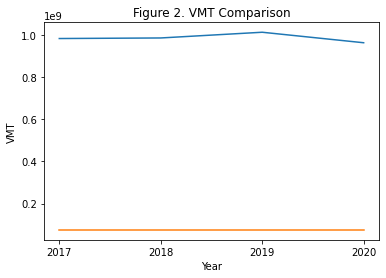

In [36]:
#Now that we see the calculated rate compared to the county rates, we should further examine the characteristics of the example roadway and the county
#roadway to see if there is a descrepency in the data. This will show the user how the example roadway characteristics compare to the county characteristics

#y1 pulls the county VMTs from the correct county depending on what county was input for the calculated rate in the rate_calc function
x1 = [2017, 2018, 2019, 2020]
y1 = [sel_row['2017 VMT'], sel_row['2018 VMT'], sel_row['2019 VMT'], sel_row['2020 VMT']]

plt.plot(x1, y1, label = 'County Total VMT')
plt.xticks(np.arange(2017, 2021, 1))

#y2 recalls the input VMT from the rate_calc function
x2 = [2017, 2018, 2019, 2020]
y2 = [comp_rate[2], comp_rate[2], comp_rate[2], comp_rate[2]]

plt.plot(x2, y2, label = 'Computed VMT')
plt.xticks(np.arange(2017, 2021, 1))

plt.xlabel('Year')
plt.ylabel('VMT')
plt.title('Figure 2. VMT Comparison')

In [37]:
#Figure 2 shows us the VMT of the input roadway was a tiny fraction of the overall county VMT. This illustration would show the user if their roadway is a 
#major contributer to the miles traveled in the county to give the user an idea of the scale for comparison. It makes a big difference if you are examining
#a local roadway with little traffic in a busy county vs. an interstate that runs through a rural county.

Text(0.5, 1.0, 'Figure 3. State Fatal Crash Rate Comparison')

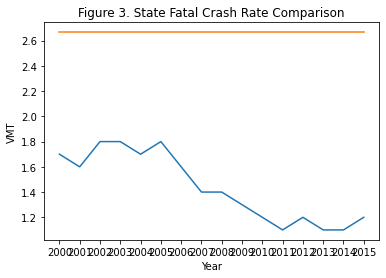

In [38]:
#Next we want to see how the calculated fatal crash rate for our study roadway compares to the fatal crash rate in the overall state.

#y1 pulls the state fatal crash rate from 2000 to 2015
x1 = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
y1 = [sel_row['2000 SR'], sel_row['2001 SR'], sel_row['2002 SR'], sel_row['2003 SR'], sel_row['2004 SR'], sel_row['2005 SR'], sel_row['2006 SR'], sel_row['2007 SR'],
    sel_row['2008 SR'], sel_row['2009 SR'], sel_row['2010 SR'], sel_row['2011 SR'], sel_row['2012 SR'], sel_row['2013 SR'], sel_row['2014 SR'], sel_row['2015 SR']]

plt.plot(x1, y1, label = 'State Fatal Crash Rate')
plt.xticks(np.arange(2017, 2021, 1))

#y2 recalls the input VMT from the rate_calc function
x2 = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
y2 = [comp_rate[1], comp_rate[1], comp_rate[1], comp_rate[1], comp_rate[1], comp_rate[1], comp_rate[1], comp_rate[1], comp_rate[1], comp_rate[1], comp_rate[1],
     comp_rate[1], comp_rate[1], comp_rate[1], comp_rate[1], comp_rate[1]]

plt.plot(x2, y2, label = 'Computed Rate')
plt.xticks(np.arange(2000, 2016, 1))

plt.xlabel('Year')
plt.ylabel('VMT')
plt.title('Figure 3. State Fatal Crash Rate Comparison')

In [39]:
#Figure 3 shows us that the calculated fatal crash rate is significantly higher than the state crash rate from 2000 to 2015. Next we want to see if the county
#fatal rates of the study area are comperable to the state rate to determine if the general area of the study area is an issue or if the roadway in question is
#the issue.

Text(0.5, 1.0, 'Figure 4. County and State Rate Comparison')

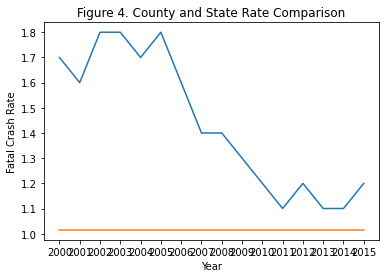

In [40]:
#y1 pulls the state fatal crash rate from 2000 to 2015
x1 = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
y1 = [sel_row['2000 SR'], sel_row['2001 SR'], sel_row['2002 SR'], sel_row['2003 SR'], sel_row['2004 SR'], sel_row['2005 SR'], sel_row['2006 SR'], sel_row['2007 SR'],
    sel_row['2008 SR'], sel_row['2009 SR'], sel_row['2010 SR'], sel_row['2011 SR'], sel_row['2012 SR'], sel_row['2013 SR'], sel_row['2014 SR'], sel_row['2015 SR']]

plt.plot(x1, y1, label = 'State Fatal Crash Rate')
plt.xticks(np.arange(2017, 2021, 1))

#The state and county data have a descrepency for their time periods as the state data only goes up to 2015 and the county data is from 2017 to 2020.
#Therefor, the county rates will be averaged into one value and overlayed on the state rate from 2000 to 2015 for comparison
#We will calculate the average rate in the county by creating a variable that pulls from the county named in the input rate_calc function

county_ave = (sel_row['2017 Rate'] + sel_row['2018 Rate'] + sel_row['2019 Rate'] + sel_row['2020 Rate']) / 4

#y2 recalls the input VMT from the rate_calc function
x2 = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
y2 = [county_ave, county_ave, county_ave, county_ave, county_ave, county_ave, county_ave, county_ave, county_ave, county_ave, county_ave, county_ave, county_ave, county_ave, county_ave, county_ave]

plt.plot(x2, y2, label = 'Average County Rate')
plt.xticks(np.arange(2000, 2016, 1))

plt.xlabel('Year')
plt.ylabel('Fatal Crash Rate')
plt.title('Figure 4. County and State Rate Comparison')

In [41]:
#Figure 4 shows us the average fatal crash rate for the county that which the study roadway is contained is lower than the state rate. That means
#the example roadway is particularly bad as the calculated study roadway rate is very high in a county that is safer than the state rates.

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Figure 5. County Fatal Crash Rate Distribution')

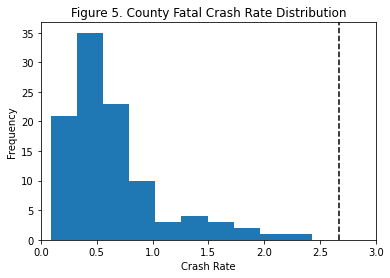

In [42]:
#Lastly, it would be interesting to see the distribution of crash rates for the counties to see where the example roadway stacks up against
#the rest of the counties. We will look at the most recent year of data, 2020

plt.hist(final_format['2020 Rate'])
plt.xlabel('Crash Rate')
plt.ylabel('Frequency')
plt.title('Distribution of County Fatal Crash Rates')
plt.xlim(0, 3)


xposition = [comp_rate[1]]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle = '--')
    
plt.title('Figure 5. County Fatal Crash Rate Distribution')

In [43]:
#Figure 5 shows us the distribution of the fatal crash rates of the counties is heavily skewed towards values between 0 and 1. The dashed line
#shows us where the example study roadway lies. The example roadway is higher than the crash rate for every county in the state. This again confirms
#the roadway in question has a fatal crash that is disproportionately higher. 

In [44]:
#Closing Remarks:

#What does this tool do?
#It allows a user to input the the number of fatal crashes and vmt of a roadway or roadway network that is being studied along with the county in which the 
#study roadway lies. It then takes the inputs, calculates a fatal crash rate per 100000000 VMT, and compares it to fatal crash rates in both the county it lies in
#and the overall state rates.

#Why is this useful?
#Nearly any traffic study is going to include analysis of the safety conditions of the roadway or roadway network in question. This tool automates some of the
#analysis that would be completed in order to evaluate the safety level on the roadway or roadway network. This is effective at giving a high level overview 
#of the safety conditons of a study roadway.

#Where does this fall short?
#Ideally, this tool would use data for all crash severities, not just fatal, as that is the more common analysis standard. However, due to limitations with
#what was available, fatal crashes were used to prove the concept. 

#How can this be improved for future use?
#Addition all crash severity types, not just fatal, for the reason stated above. The math works exactly the same so it would just be a matter of updating
#the data and formatting accordingly. This would open the door to expand the analysis to show the rate of all crashes, injury crash crashes, and fatal 
#crashes to give a more complete picture.
#Another potential use for crash analysis would be mapping of the crash locations. I haven't looked into python's capabilities in this area, but I know
#R has some packages that allow you plot geolocated features.

In [45]:
assert False, "DO NOT REMOVE THIS LINE"

AssertionError: DO NOT REMOVE THIS LINE

In [ ]:
%%bash
git pull
git add Final.ipynb
git commit -a -m "Submitting the Final"
git push